# Retail Price Prediction for Cars


# 1. Exploratory Data Analysis (EDA)


## 1.1 Loading the data into the data frame.


In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv' )
print(data.head())
data.head()

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 1.2 Visualization.


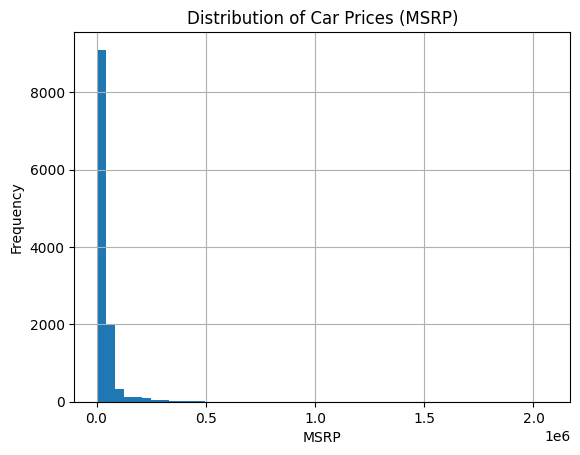

In [11]:
import matplotlib.pyplot as plt

# Visualize MSRP distributions using histograms
data['MSRP'].plot(kind='hist', bins=50)
plt.title('Distribution of Car Prices (MSRP)')  # Adding the title
plt.xlabel('MSRP')  # Adding x-axis label
plt.ylabel('Frequency')  # Adding y-axis label
plt.grid(True)  # Adding a grid for better visualization
plt.show()


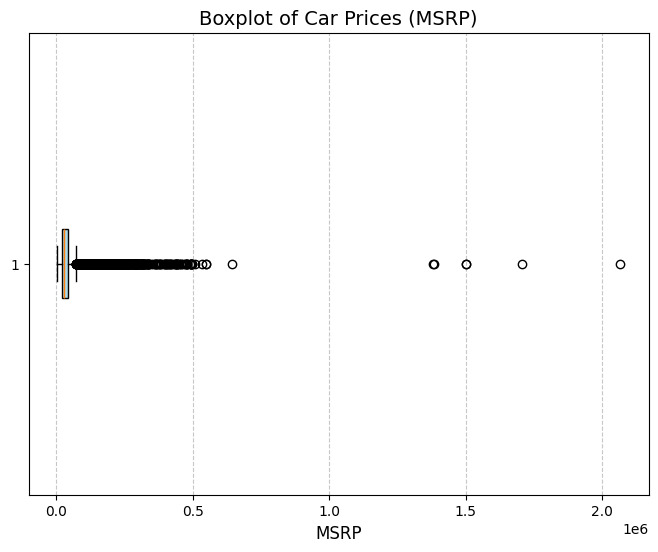

In [12]:
# Boxplot of MSRP
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(data['MSRP'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot of Car Prices (MSRP)', fontsize=14)  # Add a title
plt.xlabel('MSRP', fontsize=12)  # Label x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for x-axis
plt.show()


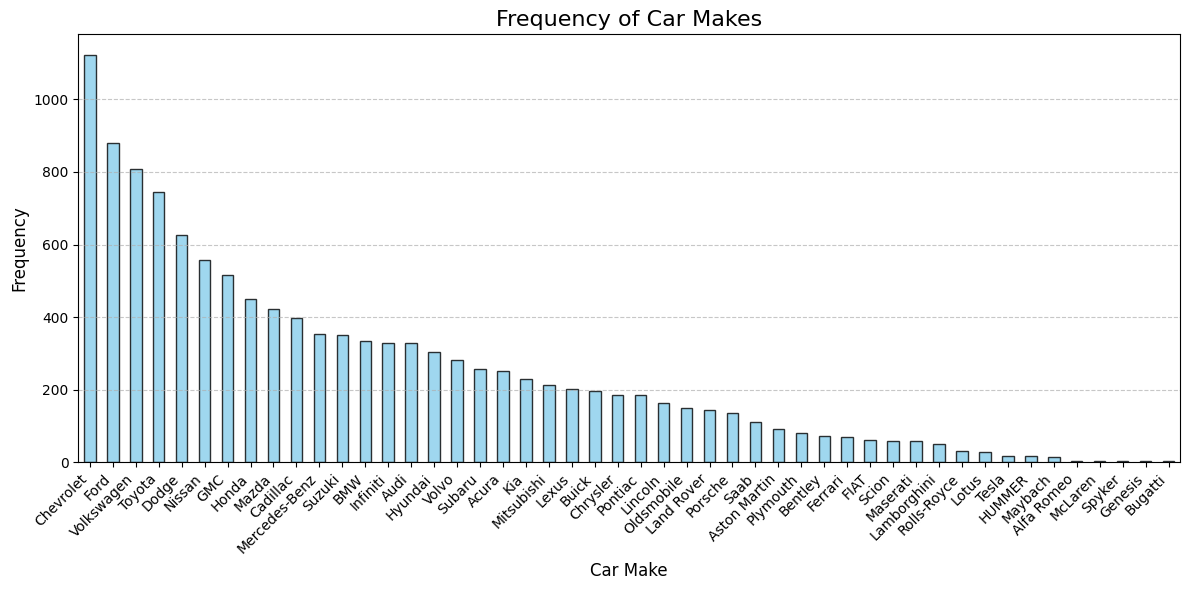

In [13]:
# Count the frequency of each category
plt.figure(figsize=(12, 6))  # Set figure size
data['Make'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Frequency of Car Makes', fontsize=16)  # Add a descriptive title
plt.xlabel('Car Make', fontsize=12)  # Label x-axis
plt.ylabel('Frequency', fontsize=12)  # Label y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


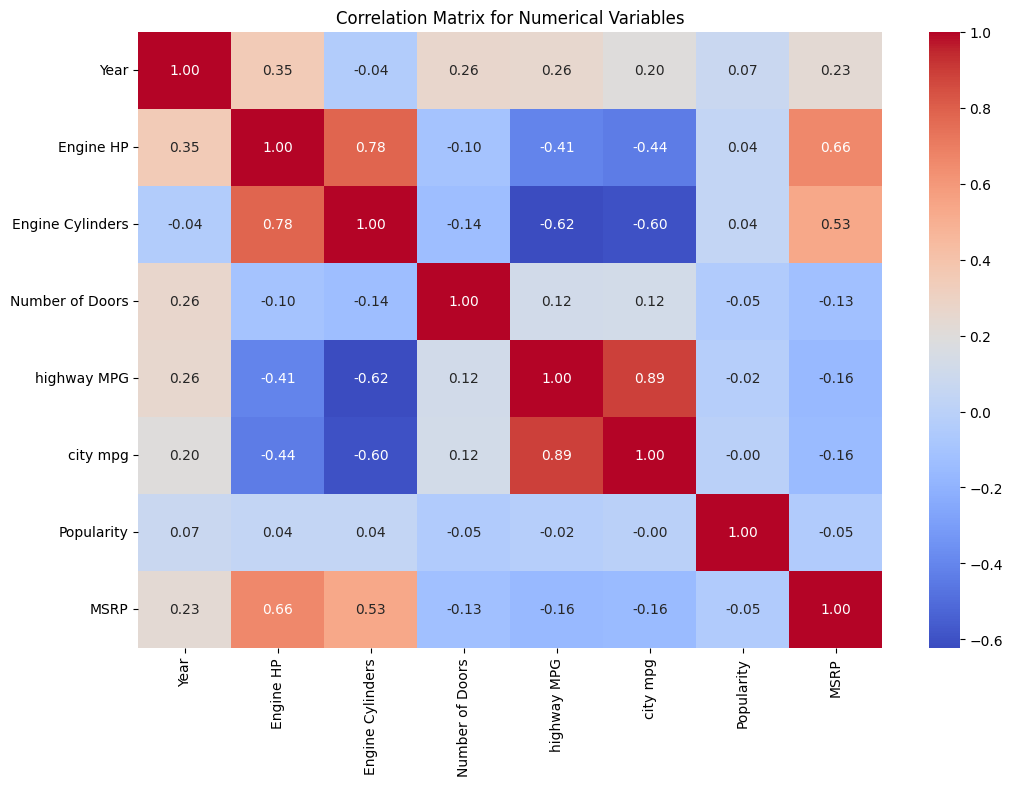

In [14]:
import seaborn as sns
import numpy as np

# Compute correlations for numerical variables.
numeric_data = data.select_dtypes(include=[np.number])
# print(numeric_data.corr())
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


# 1. Data Preprocessing and Feature Engineering


## 2.1 Remove outliers


In [15]:
# Remove duplicates
data = data.drop_duplicates()

In [16]:
# Drop irrelevant features 
data = data.drop(['Make', 'Model'], axis=1)

In [17]:
Q1 = data['MSRP'].quantile(0.25)  # 25th Percentile
Q3 = data['MSRP'].quantile(0.75)  # 75th Percentile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filtered data
data = data[(data['MSRP'] >= lower_bound) & (data['MSRP'] <= upper_bound)]

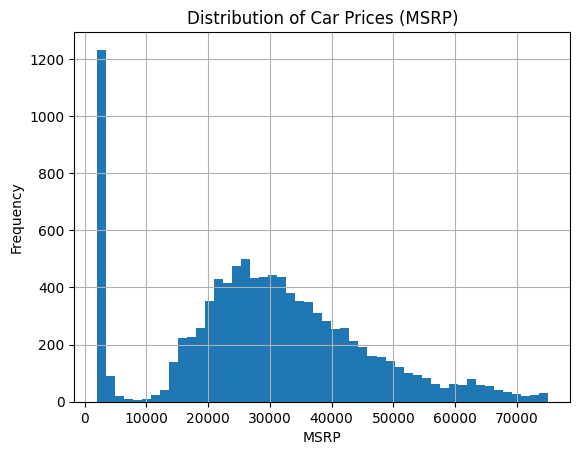

In [18]:


# Visualize MSRP distributions using histograms
data['MSRP'].plot(kind='hist', bins=50)
plt.title('Distribution of Car Prices (MSRP)')  # Adding the title
plt.xlabel('MSRP')  # Adding x-axis label
plt.ylabel('Frequency')  # Adding y-axis label
plt.grid(True)  # Adding a grid for better visualization
plt.show()



## 1.2 Handle Missing Values


In [19]:
# Total number of observations
total_observations = data.shape[0]
print(f"Total number of observations: {total_observations}")

# Total number of missing values per column
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Total number of missing values in the dataset
total_missing_values = data.isnull().sum().sum()
print(f"Total number of missing values in the dataset: {total_missing_values}")


Total number of observations: 10239
Missing values per column:
Year                    0
Engine Fuel Type        3
Engine HP              59
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         3
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64
Total number of missing values in the dataset: 3471


In [20]:

# Fill missing values for categorical columns with mode
categorical_columns = ['Engine Fuel Type', 'Number of Doors']
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

# Fill missing values for numerical columns with median
numerical_columns = ['Engine HP', 'Engine Cylinders']
for column in numerical_columns:
    data[column] = data[column].fillna(data[column].median())

# Drop the column with significant missing values
if 'Market Category' in data.columns:
    data = data.drop(columns=['Market Category'])

# Check the result
print("Missing values after handling:")
print(data.isnull().sum())


Missing values after handling:
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


## 1.4 Scale the Target Variable


In [21]:

# One-Hot Encoding for Categorical Variables
columns_to_dummy = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
                    'Market Category', 'Vehicle Size', 'Vehicle Style']

existing_columns_to_dummy = [col for col in columns_to_dummy if col in data.columns]

data = pd.get_dummies(data, columns=existing_columns_to_dummy, drop_first=True)


In [22]:
# Scale MSRP by 10,000
data['MSRP'] = data['MSRP'] / 10000  

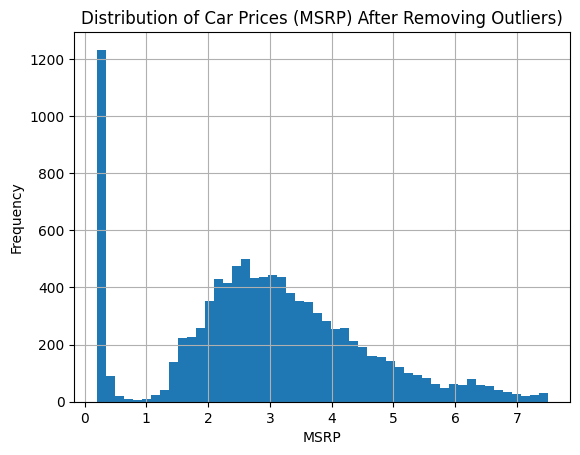

In [23]:

# Visualize MSRP distributions using histograms
data['MSRP'].plot(kind='hist', bins=50)
plt.title('Distribution of Car Prices (MSRP) After Removing Outliers)')  # Adding the title
plt.xlabel('MSRP')  # Adding x-axis label
plt.ylabel('Frequency')  # Adding y-axis label
plt.grid(True)  # Adding a grid for better visualization
plt.show()

# 4. Train-Test Split


In [24]:
from sklearn.model_selection import train_test_split

X = data.drop('MSRP', axis=1)
y = data['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Model Building


## 5.1 Ridge Regression


Best Alpha: 10
RMSE: 0.7111
R²: 0.7972


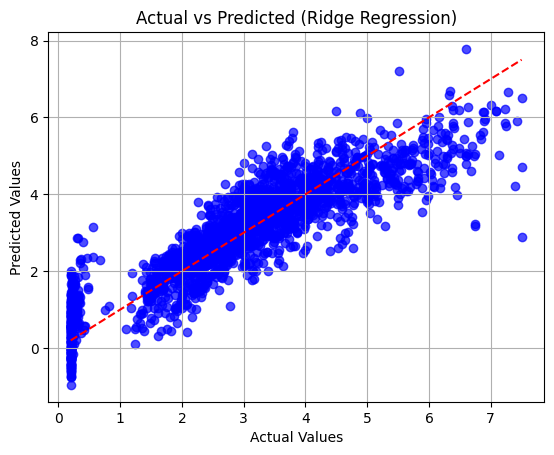

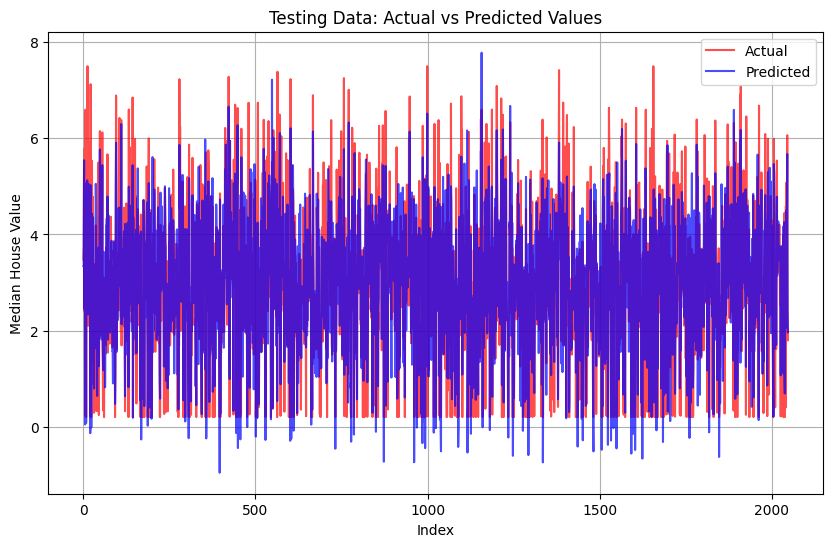

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline with scaling and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('ridge', Ridge())             # Step 2: Apply Ridge Regression
])

# Define hyperparameter grid for alpha
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 200, 500]
}

# Use GridSearchCV for hyperparameter tuning
ridge_grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best alpha value
best_alpha = ridge_grid.best_params_['ridge__alpha']
print(f"Best Alpha: {best_alpha}")


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = ridge_grid.best_estimator_.predict(X_test)

# Calculate RMSE and R^2
mse = mean_squared_error(y_test, y_pred)
rmse_ridge = np.sqrt(mse)
r2_ridge = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_ridge:.4f}")
print(f"R²: {r2_ridge:.4f}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set using the Ridge model
y_pred = ridge_grid.best_estimator_.predict(X_test)

# Plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="red", alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="blue", alpha=0.7)
plt.title("Testing Data: Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Median House Value")
plt.legend()
plt.grid()
plt.show()



## 5.2 Lasso Regression model


Best Alpha (Regularization Strength): 0.01
Root Mean Squared Error (RMSE): 0.7142
R² Score: 0.7953


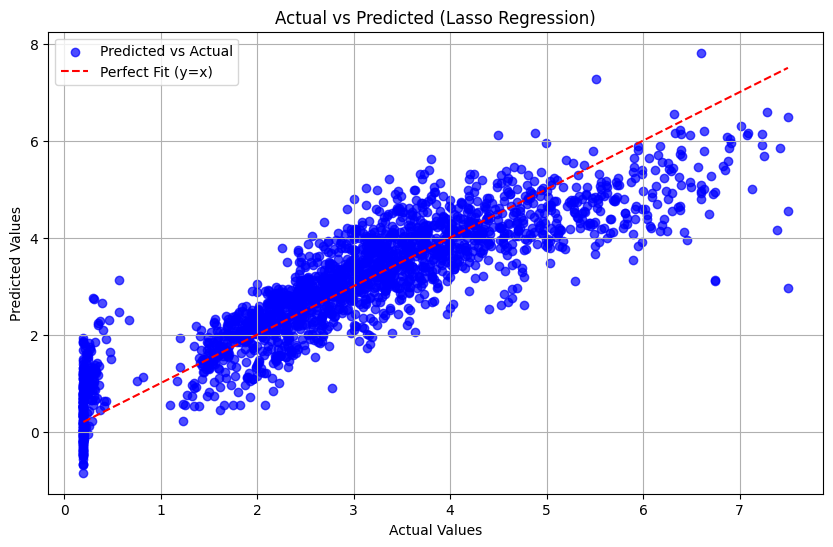

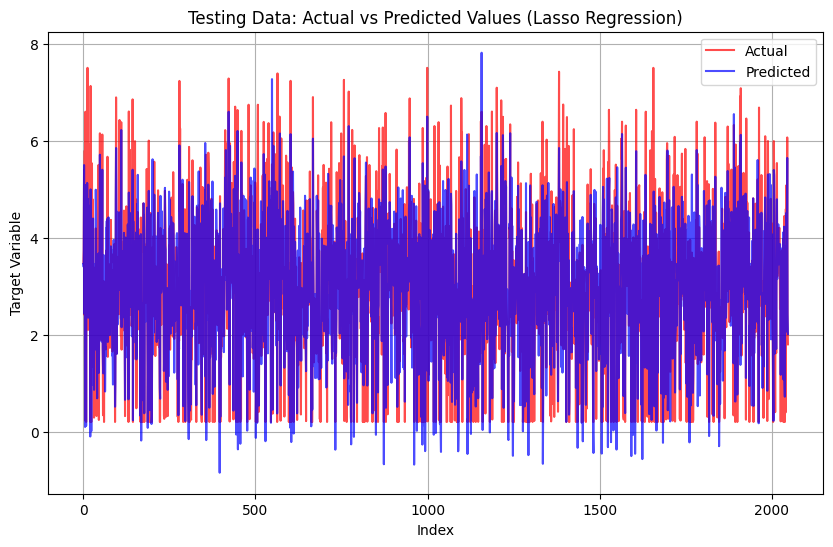

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline: scaling + Lasso Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('lasso', Lasso(max_iter=10000))  # Apply Lasso Regression
])

# Define the hyperparameter grid for alpha
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 50, 100]
}

# Set up GridSearchCV for hyperparameter tuning
lasso_grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Best alpha value
best_alpha = lasso_grid.best_params_['lasso__alpha']
print(f"Best Alpha (Regularization Strength): {best_alpha}")

# Predict on the test set using the best Lasso model
y_pred = lasso_grid.best_estimator_.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mse)
r2_lasso = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")

# Scatter plot: Actual vs Predicted for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (y=x)")
plt.title('Actual vs Predicted (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


# Plot: Actual vs Predicted values 
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="red", alpha=0.7, linewidth=1.5)
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="blue", alpha=0.7, linewidth=1.5)
plt.title("Testing Data: Actual vs Predicted Values (Lasso Regression)")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.grid()
plt.show()


## Linear models may not be complex enough to capture the relationship between the features and target.

## Consider using tree-based models like Random Forest or Gradient Boosting, which are more flexible and can handle non-linear relationships.


## 5.3 Randon Forest


In [28]:

from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30]
}

# Create a pipeline with scaling and Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('model', RandomForestRegressor(random_state=42))  
])

# Use GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(
    rf_pipeline, 
    param_grid=param_grid_rf, 
    cv=3,  
    scoring='neg_mean_squared_error',  
    verbose=1,  # Verbosity to show progress
    n_jobs=1  # Use a single core to avoid pickling issues
)

# Fit the GridSearchCV on training data
rf_grid_search.fit(X_train, y_train)

# Extract the best model
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Random Forest Regressor (GridSearchCV) - RMSE: {rmse_rf:.4f}, R^2 Score: {r2_rf:.4f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 300}
Random Forest Regressor (GridSearchCV) - RMSE: 0.3676, R^2 Score: 0.9458


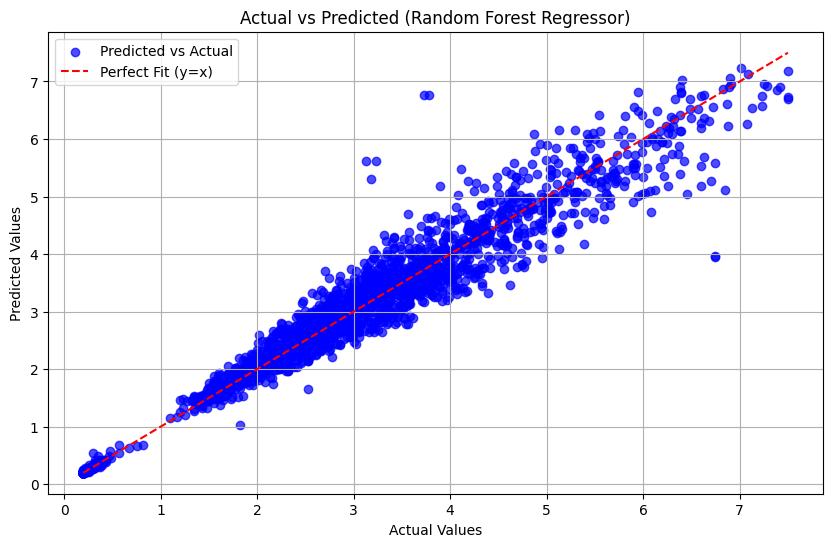

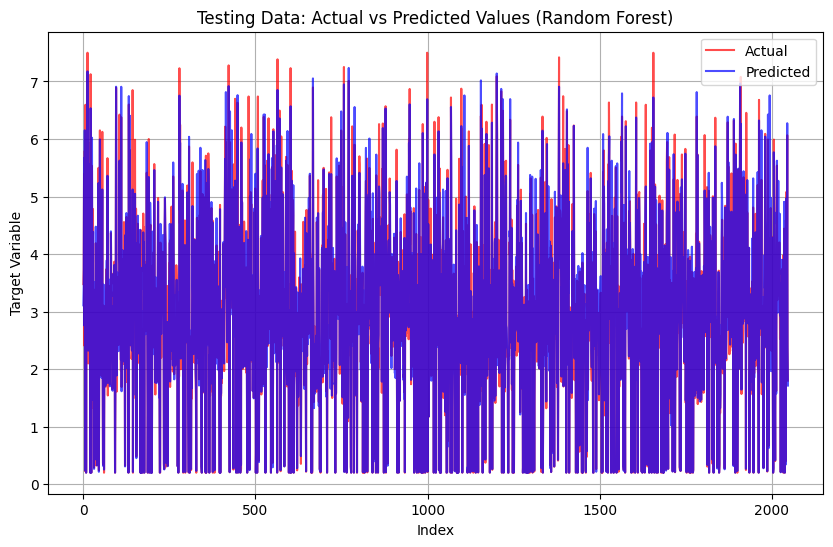

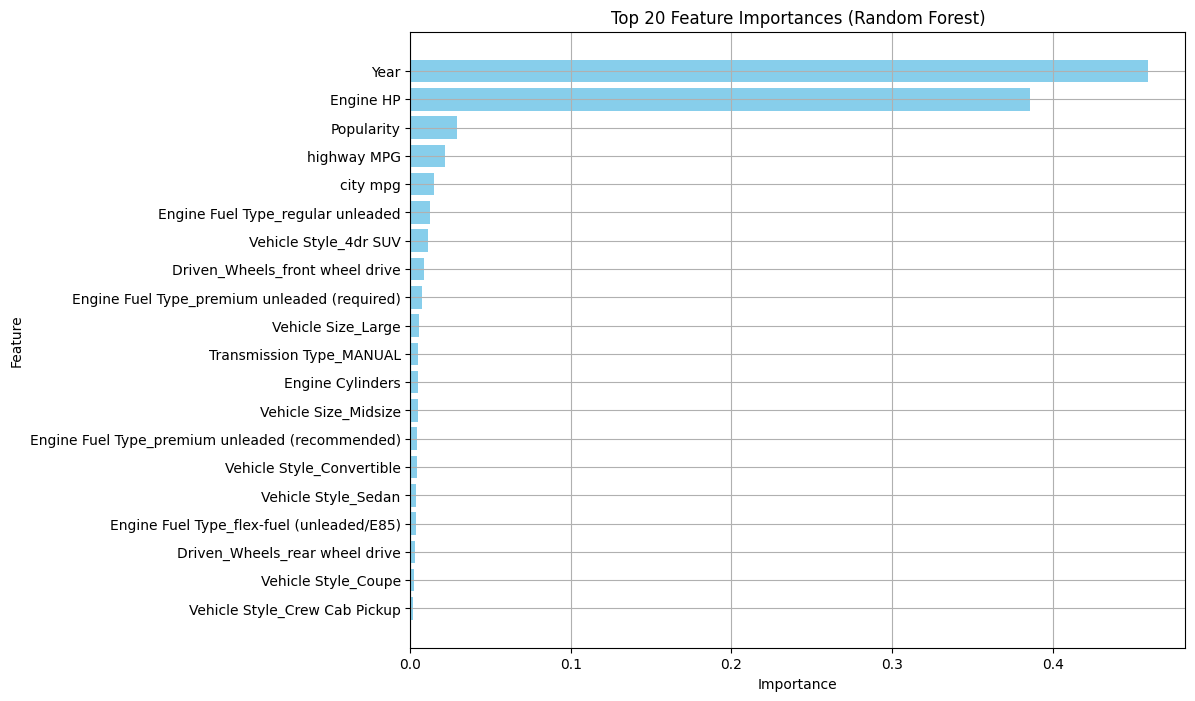

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (y=x)")
plt.title('Actual vs Predicted (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Extract feature importances and sort them
feature_importances = best_rf_model.named_steps['model'].feature_importances_
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Limit to Top-N features
top_n = 20  # Display only the top 20 features
top_features = importance_df.head(top_n)

# Line Plot: Actual vs Predicted Values for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="red", alpha=0.7, linewidth=1.5)
plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Predicted", color="blue", alpha=0.7, linewidth=1.5)
plt.title("Testing Data: Actual vs Predicted Values (Random Forest)")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.grid()
plt.show()


# Bar Plot: Feature Importances
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color="skyblue")
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid()
plt.show()


## 5.4 Gradient Boosting Model (GBM)


In [33]:
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer


# Handle boolean columns by converting them to integers
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes(include=['bool']).columns})

# Check and handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Ensure target shape is 1D
y_train = y_train.ravel()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10]
}

# Initialize LightGBM
lgbm = LGBMRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict and evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_gbm = np.sqrt(mse)
r2_gbm = r2_score(y_test, y_pred)

print(f"Tuned LightGBM - RMSE: {rmse_gbm:.4f}, R²: {r2_gbm:.4f}")


/var/folders/tx/xqtj99597b1g3xwmxgm3lrsh0000gn/T/ipykernel_73226/2945854704.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 5460, number of used features: 34
[LightGBM] [Info] Start training from score 2.950677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 5461, number of used features: 34
[LightGBM] [Info] Start training from score 2.942270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise

/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 8191, number of used features: 36
[LightGBM] [Info] Start training from score 2.942837
Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 500}
Tuned LightGBM - RMSE: 0.3174, R²: 0.9596


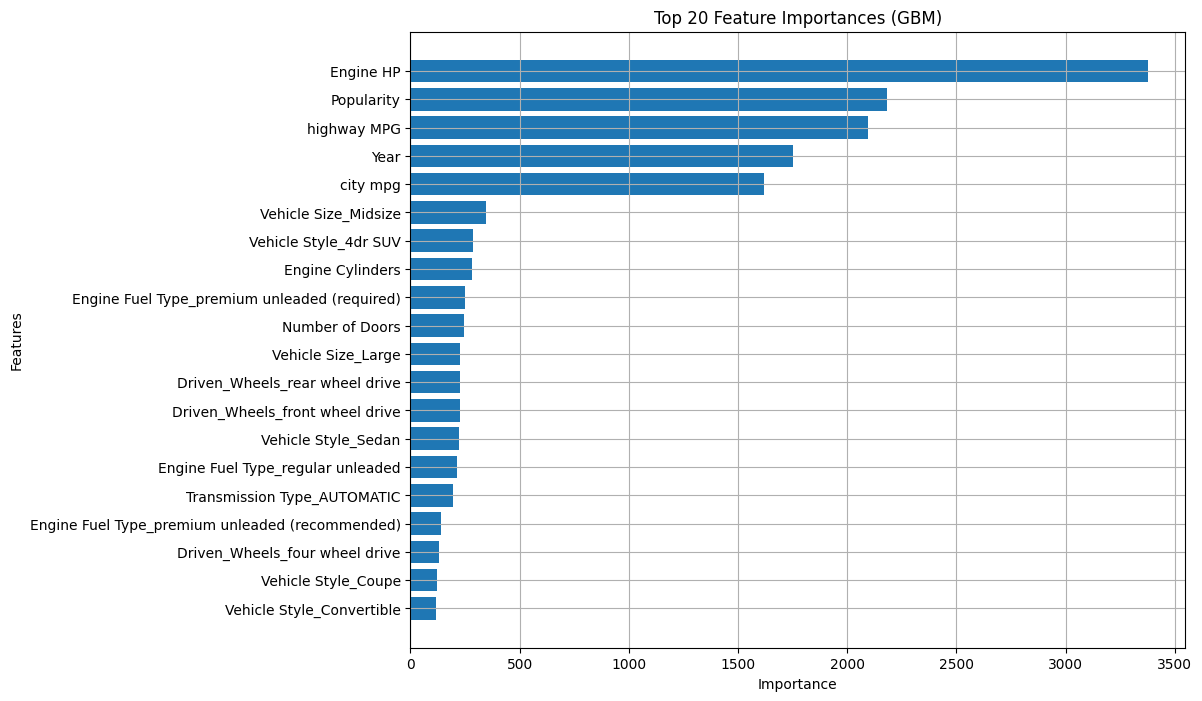

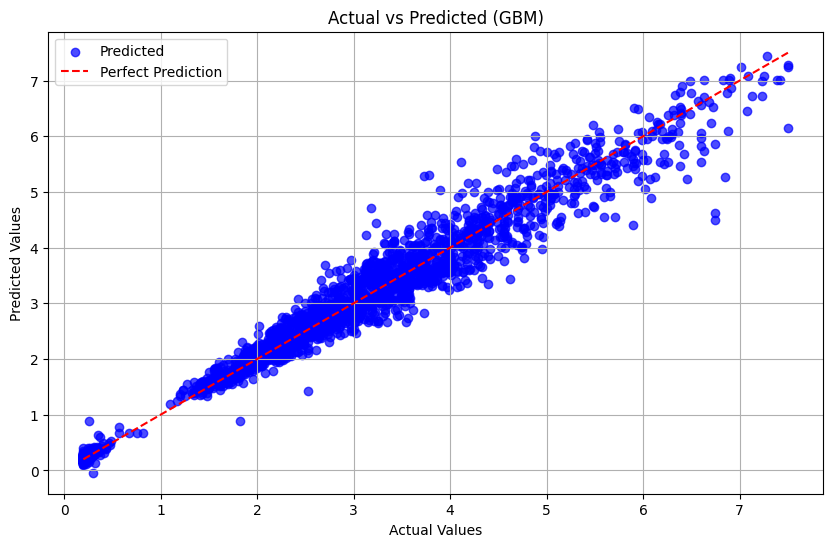

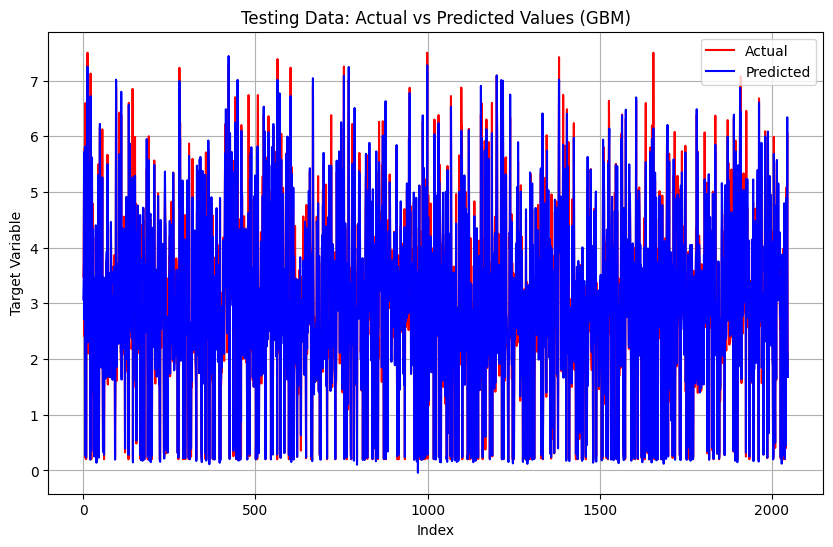

In [34]:
# plot1: Extract feature importance
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[-20:]  # Top 20 features

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])  # Replace with feature names if available
plt.title('Top 20 Feature Importances (GBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

# Plot 2: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted (GBM)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Generate the Actual vs Predicted Values plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')  # Plot actual values
plt.plot(range(len(y_test)), y_pred, color='blue', label='Predicted')  # Plot predicted values
plt.title('Testing Data: Actual vs Predicted Values (GBM)')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.legend()
plt.grid(True)
plt.show()


# 5.5 SVM Model


Best SVM Parameters: {'kernel': 'rbf', 'epsilon': 0.1, 'C': np.float64(21.54434690031882)}


/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVM RMSE: 0.5322
SVM R²: 0.8864


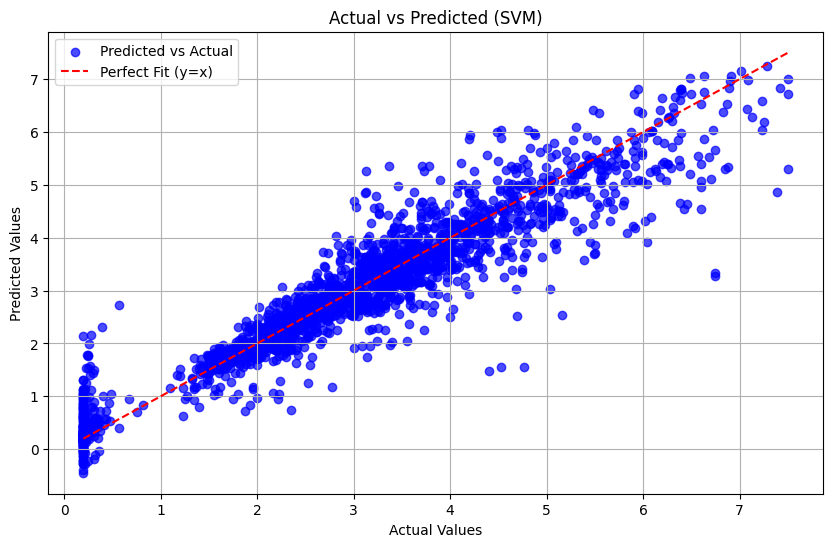

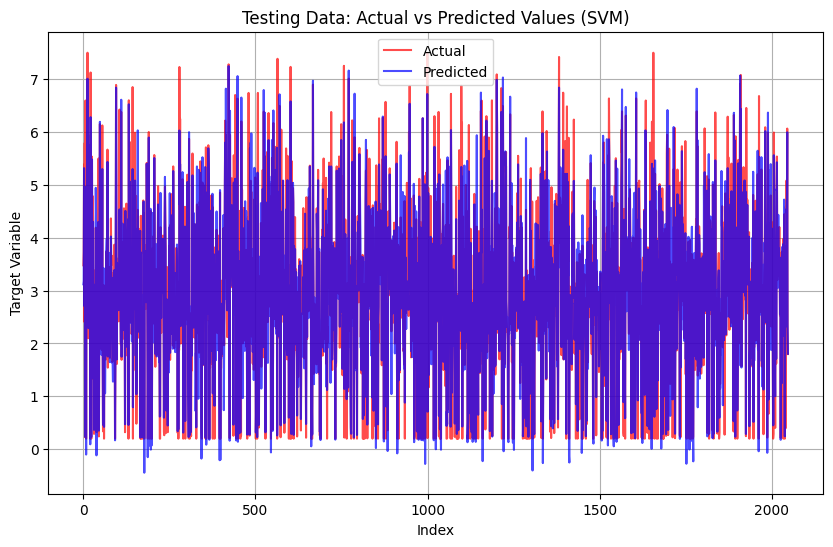

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# PCA for dimensionality reduction ( for saving running time !)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define SVM with RandomizedSearchCV
svm_param_dist = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': np.logspace(-1, 2, 10),  # Logarithmic scale for 'C'
    'epsilon': [0.1, 0.2, 0.5]
}

# Use RandomizedSearchCV for faster hyperparameter tuning
svm_random = RandomizedSearchCV(SVR(), param_distributions=svm_param_dist, n_iter=10, 
                                 cv=5, scoring='neg_mean_squared_error', 
                                 random_state=42, n_jobs=-1)
svm_random.fit(X_train_pca, y_train)

# Best parameters
best_svm_params = svm_random.best_params_
print(f"Best SVM Parameters: {best_svm_params}")

# Predict and evaluate SVM
y_pred_svm = svm_random.best_estimator_.predict(X_test_pca)

# Metrics
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM RMSE: {rmse_svm:.4f}")
print(f"SVM R²: {r2_svm:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (y=x)")
plt.title('Actual vs Predicted (SVM)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Line plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="red", alpha=0.7, linewidth=1.5)
plt.plot(range(len(y_pred_svm)), y_pred_svm, label="Predicted", color="blue", alpha=0.7, linewidth=1.5)
plt.title("Testing Data: Actual vs Predicted Values (SVM)")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.grid()
plt.show()



# 5.6 KNN Model


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KNN RMSE: 0.4450
KNN R²: 0.9206


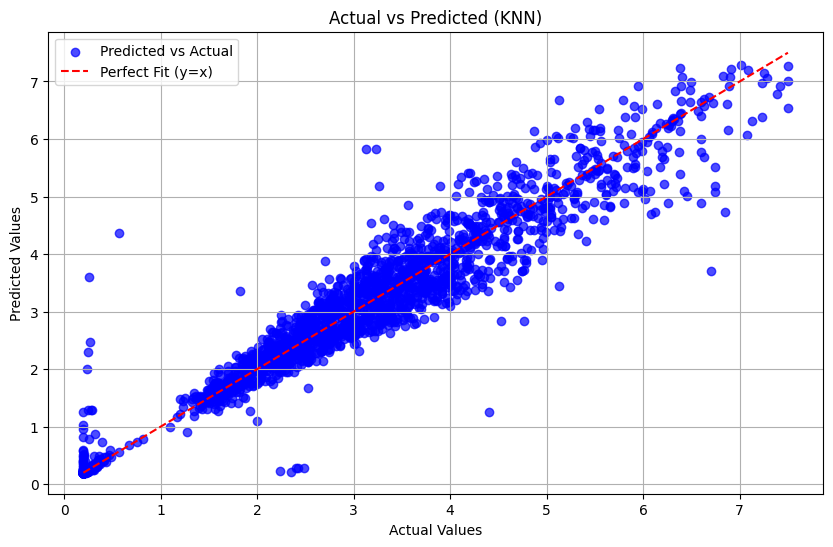

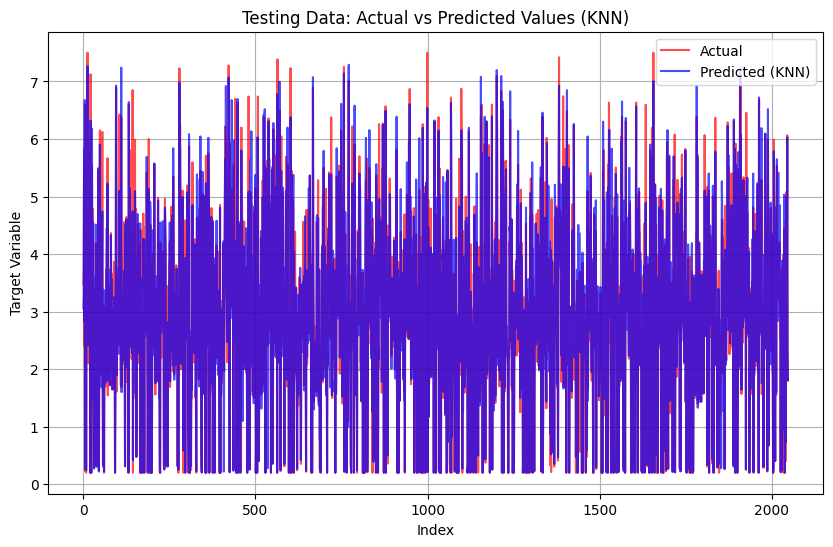

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define KNN model with GridSearchCV
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param_grid, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

# Best parameters
best_knn_params = knn_grid.best_params_
print(f"Best KNN Parameters: {best_knn_params}")

# Predict and evaluate KNN
y_pred_knn = knn_grid.best_estimator_.predict(X_test_scaled)

# Metrics
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN RMSE: {rmse_knn:.4f}")
print(f"KNN R²: {r2_knn:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (y=x)")
plt.title('Actual vs Predicted (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Line plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="red", alpha=0.7, linewidth=1.5)
plt.plot(range(len(y_pred_knn)), y_pred_knn, label="Predicted (KNN)", color="blue", alpha=0.7, linewidth=1.5)
plt.title("Testing Data: Actual vs Predicted Values (KNN)")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.grid()
plt.show()


# 5.7 Neural Network


In [42]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define Neural Network with GridSearchCV
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

nn_grid = GridSearchCV(MLPRegressor(max_iter=500), param_grid=nn_param_grid, cv=5, 
                       scoring='neg_mean_squared_error', n_jobs=-1)
nn_grid.fit(X_train_scaled, y_train)

# Best parameters
best_nn_params = nn_grid.best_params_
print(f"Best Neural Network Parameters: {best_nn_params}")

# Predict and evaluate Neural Network
y_pred_nn = nn_grid.best_estimator_.predict(X_test_scaled)

# Metrics
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network RMSE: {rmse_nn:.4f}")
print(f"Neural Network R²: {r2_nn:.4f}")


/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/sklearn/n

Best Neural Network Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Neural Network RMSE: 0.4435
Neural Network R²: 0.9211


/Users/darkghost/Documents/Tamucc/class/5301PRINCIPLES-OF-DATA-SCIENCE/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


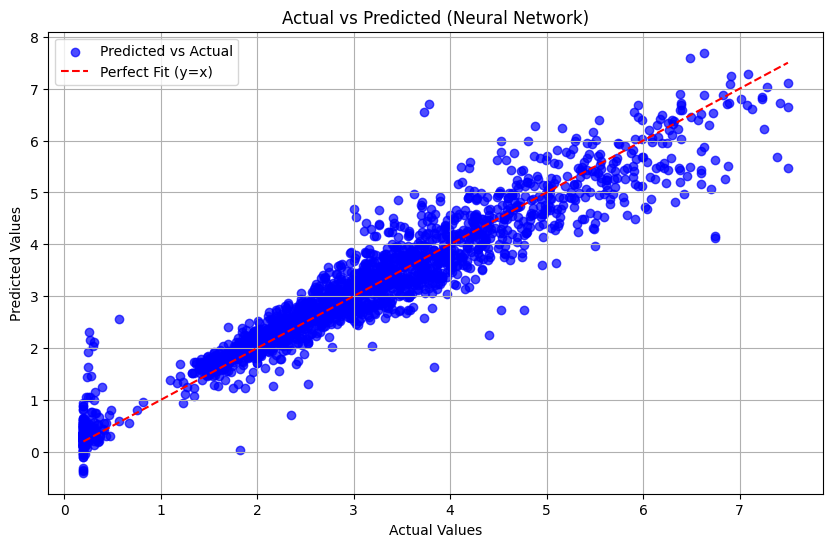

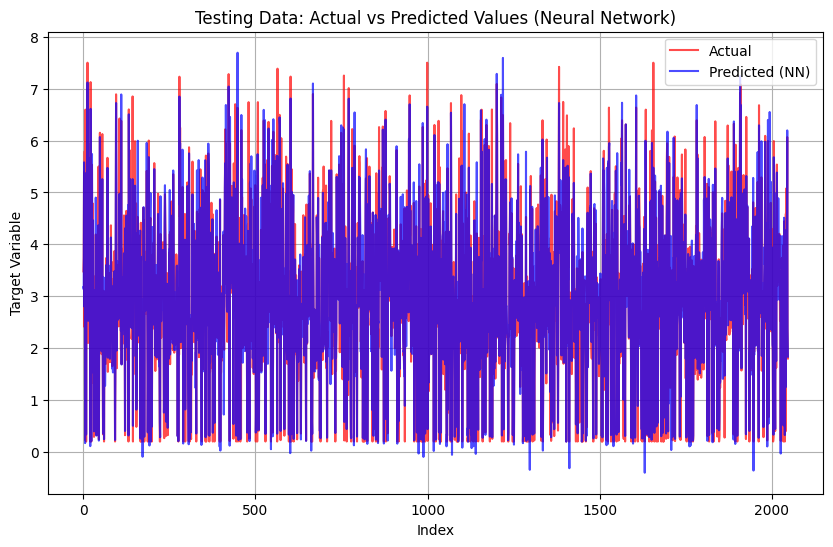

In [43]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (y=x)")
plt.title('Actual vs Predicted (Neural Network)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Line plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="red", alpha=0.7, linewidth=1.5)
plt.plot(range(len(y_pred_nn)), y_pred_nn, label="Predicted (NN)", color="blue", alpha=0.7, linewidth=1.5)
plt.title("Testing Data: Actual vs Predicted Values (Neural Network)")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.grid()
plt.show()

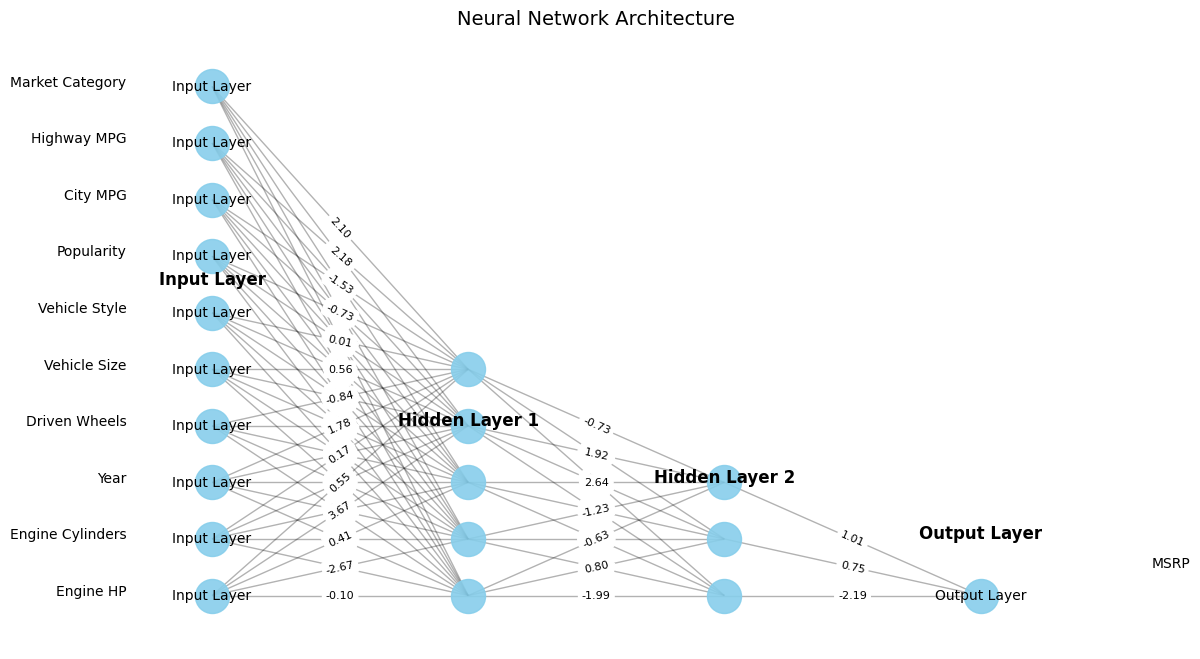

In [51]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Simulated weights for visualization
# Replace these with actual weights from your trained neural network
input_to_hidden1_weights = np.random.randn(10, 5)  # Simulating weights from input to hidden layer 1
hidden1_to_hidden2_weights = np.random.randn(5, 3)  # Simulating weights from hidden layer 1 to 2
hidden2_to_output_weights = np.random.randn(3, 1)  # Simulating weights from hidden layer 2 to output

weights = [input_to_hidden1_weights, hidden1_to_hidden2_weights, hidden2_to_output_weights]

# Define a smaller architecture for visualization
input_features = ['Engine HP', 'Engine Cylinders', 'Year', 'Driven Wheels', 'Vehicle Size', 
                  'Vehicle Style', 'Popularity', 'City MPG', 'Highway MPG', 'Market Category']
n_input = len(input_features)
n_hidden1 = 5
n_hidden2 = 3
n_output = 1

# Create layers
layers = [
    {'neurons': n_input, 'label': 'Input Layer'},
    {'neurons': n_hidden1, 'label': 'Hidden Layer 1'},
    {'neurons': n_hidden2, 'label': 'Hidden Layer 2'},
    {'neurons': n_output, 'label': 'Output Layer'}
]

# Create graph
G = nx.DiGraph()

# Add nodes and connections
positions = {}
y_offset = 2
x_offset = 3
node_labels = {}
edge_labels = {}

for i, layer in enumerate(layers):
    for j in range(layer['neurons']):
        node_name = f'{layer["label"]}_{j+1}'
        G.add_node(node_name, layer=layer['label'])
        positions[node_name] = (i * x_offset, j * y_offset)
        node_labels[node_name] = layer['label'] if i == 0 or i == len(layers) - 1 else ''

        # Connect to previous layer
        if i > 0:
            prev_layer = layers[i - 1]
            for k in range(prev_layer['neurons']):
                prev_node_name = f'{prev_layer["label"]}_{k+1}'
                G.add_edge(prev_node_name, node_name)
                
                # Assign weights to edges
                edge_weight = weights[i - 1][k, j] if i - 1 < len(weights) else 0
                edge_labels[(prev_node_name, node_name)] = f'{edge_weight:.2f}'

# Visualize the neural network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, positions, node_size=600, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, positions, arrows=False, alpha=0.3)
nx.draw_networkx_labels(G, positions, labels=node_labels, font_size=10)

# Add layer labels
for i, layer in enumerate(layers):
    x_position = i * x_offset
    y_position = (layer['neurons'] - 1) * y_offset / 2
    plt.text(x_position, y_position + 2, layer['label'], fontsize=12, ha='center', fontweight='bold')

# Add feature names and output label
for i, feature in enumerate(input_features):
    plt.text(-1, i * y_offset, feature, fontsize=10, ha='right')
plt.text(len(layers) * x_offset - 1, y_offset / 2, "MSRP", fontsize=10, ha='left')

# Draw edge labels for weights
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels, font_size=8, label_pos=0.5)

plt.title('Neural Network Architecture', fontsize=14)
plt.axis('off')
plt.show()


In [46]:
import pandas as pd


model_results = {
    'Model': ['Ridge Regression', 'Lasso Regression', 'Random Forest', 'Gradient Boosting', 
              'SVM', 'KNN', 'Neural Network'],
    'RMSE': [rmse_ridge, rmse_lasso, rmse_rf, rmse_gbm, rmse_svm, rmse_knn, rmse_nn],
    'R²': [r2_ridge, r2_lasso, r2_rf, r2_gbm, r2_svm, r2_knn, r2_nn]
}

results_df = pd.DataFrame(model_results)


print("Model Performance Comparison:")
print(results_df.to_string(index=False))

results_styled = results_df.style.highlight_min(subset=['RMSE'], color='lightgreen').highlight_max(subset=['R²'], color='lightblue')


results_styled


Model Performance Comparison:
            Model     RMSE       R²
 Ridge Regression 0.711052 0.797165
 Lasso Regression 0.714228 0.795349
    Random Forest 0.367645 0.945775
Gradient Boosting 0.317428 0.959577
              SVM 0.532230 0.886358
              KNN 0.445013 0.920552
   Neural Network 0.443507 0.921088


,Model,RMSE,R²
0,Ridge Regression,0.711052,0.797165
1,Lasso Regression,0.714228,0.795349
2,Random Forest,0.367645,0.945775
3,Gradient Boosting,0.317428,0.959577
4,SVM,0.532230,0.886358
5,KNN,0.445013,0.920552
6,Neural Network,0.443507,0.921088


Bayesian Ridge Regression RMSE: 0.6258
Bayesian Ridge Regression R²: 0.8429


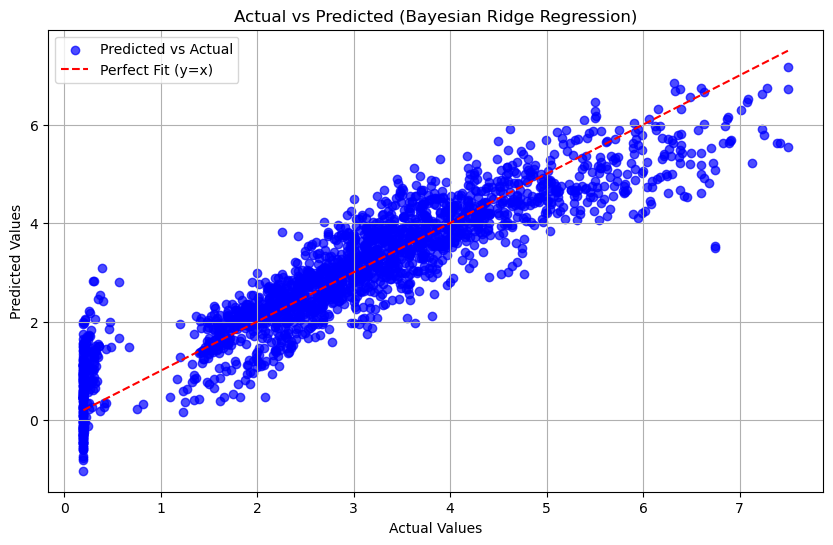

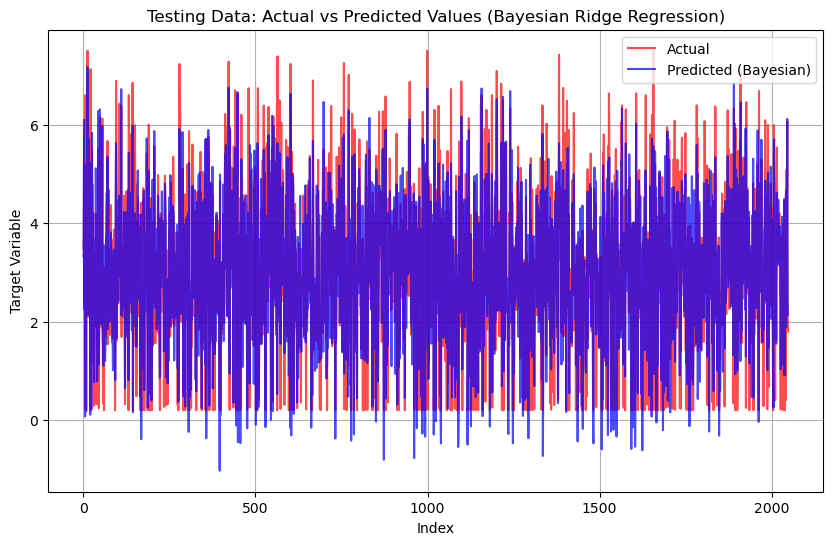

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define Bayesian Ridge Regression model
bayesian_model = BayesianRidge()

# Fit the model to training data
bayesian_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_bayesian = bayesian_model.predict(X_test_scaled)

# Evaluate the model
rmse_bayesian = mean_squared_error(y_test, y_pred_bayesian, squared=False)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print(f"Bayesian Ridge Regression RMSE: {rmse_bayesian:.4f}")
print(f"Bayesian Ridge Regression R²: {r2_bayesian:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bayesian, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (y=x)")
plt.title('Actual vs Predicted (Bayesian Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Line plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="red", alpha=0.7, linewidth=1.5)
plt.plot(range(len(y_pred_bayesian)), y_pred_bayesian, label="Predicted (Bayesian)", color="blue", alpha=0.7, linewidth=1.5)
plt.title("Testing Data: Actual vs Predicted Values (Bayesian Ridge Regression)")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.linear_model import BayesianRidge

# 在最尾端新增贝叶斯回归模型的代码和对比分析

# 贝叶斯回归模型
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# 贝叶斯预测
y_pred_bayesian = bayesian_model.predict(X_test)

# 贝叶斯回归性能评估
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
r2_bayesian = r2_score(y_test, y_pred_bayesian)

# 结果对比输出
results = pd.DataFrame({
    "Model": ["Bayesian Ridge", "Random Forest", "Gradient Boosting"],
    "R²": [r2_bayesian, 0.9458, 0.9596],
    "RMSE": [rmse_bayesian, 0.3676, 0.3174]
})

# 生成对比表格
results


NameError: name 'X_train' is not defined